<a href="https://colab.research.google.com/github/ArnyWu/-Preview-AI-/blob/main/0919%E9%87%91%E8%9E%8D%E5%A4%A7%E6%95%B8%E6%93%9A%E4%BD%9C%E6%A5%AD01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib

# 改style要在改font之前
# plt.style.use('seaborn')

matplotlib.font_manager.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')

--2024-09-19 06:49:54--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.251.163.102, 142.251.163.139, 142.251.163.100, ...
Connecting to drive.google.com (drive.google.com)|142.251.163.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-09-19 06:49:54--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 64.233.180.132, 2607:f8b0:4004:c21::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|64.233.180.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  77.7MB/s    in 0.3s    

2024-09-19 06



# 1.   Yahoo


# 資料收集

透過 yfinance 從 Yahoo 奇摩金融下載歷史股價資料

In [ ]:
import yfinance as yf

# 定義股票代號和日期範圍
ticker = '2603.TW'  # 長榮
start_date = '2021-01-01'
end_date = '2024-09-01'

# 下載股票資料
stock_data = yf.download(ticker, start=start_date, end=end_date)

# 查看前幾筆資料
print(stock_data.head())

[*********************100%***********************]  1 of 1 completed

               Open     High      Low    Close  Adj Close     Volume
Date                                                                
2021-01-04  105.875  111.875  105.375  111.875  46.279884  205450606
2021-01-05  112.500  113.750  107.875  113.750  47.055523  213546933
2021-01-06  111.875  115.500  105.625  106.375  44.004673  225659620
2021-01-07  108.250  109.500   95.750   96.125  39.764507  310278912
2021-01-08   96.250  101.875   93.000  100.750  41.677746  219431754


資料包含：

Open: 開盤價
High: 最高價
Low: 最低價
Close: 收盤價
Volume: 交易量

# 資料清理

檢查是否有缺失值

In [ ]:
import pandas as pd
print(stock_data.isnull().sum())

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


檢查重複值

In [ ]:
print(stock_data.duplicated().sum())

6


In [ ]:
# 移除重複的資料
stock_data = stock_data.drop_duplicates()

print(stock_data.duplicated().sum())

0


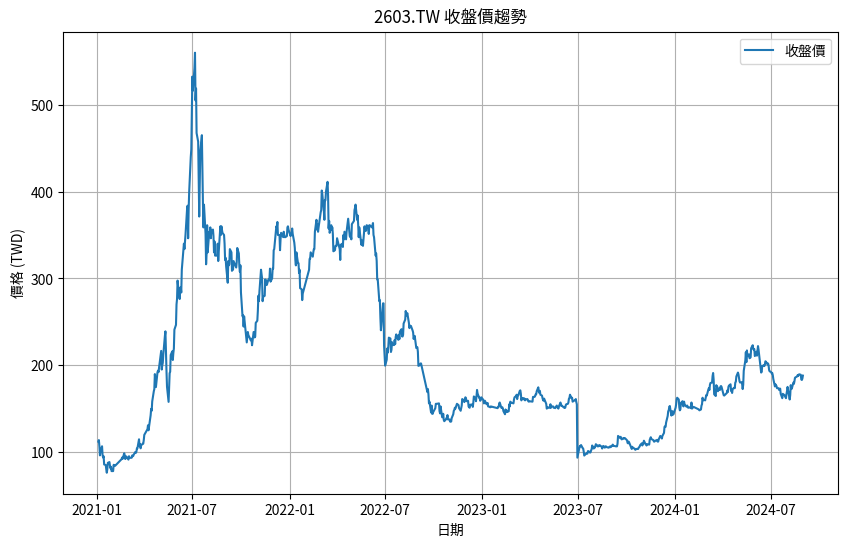

In [ ]:
import matplotlib.pyplot as plt

# 畫收盤價的趨勢圖
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Close'], label='收盤價')
plt.title(f'{ticker} 收盤價趨勢')
plt.xlabel('日期')
plt.ylabel('價格 (TWD)')
plt.legend()
plt.grid(True)
plt.show()

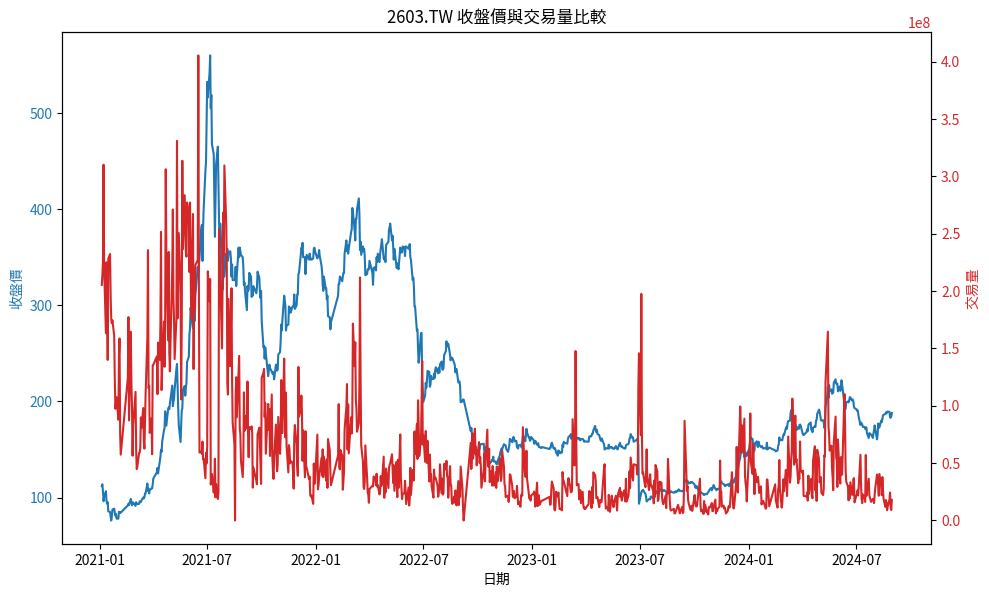

In [ ]:
# 畫出收盤價和交易量的比較圖
fig, ax1 = plt.subplots(figsize=(10, 6))

# 收盤價
ax1.set_xlabel('日期')
ax1.set_ylabel('收盤價', color='tab:blue')
ax1.plot(stock_data.index, stock_data['Close'], color='tab:blue', label='收盤價')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# 建立第二個 Y 軸，共享 X 軸
ax2 = ax1.twinx()
ax2.set_ylabel('交易量', color='tab:red')
ax2.plot(stock_data.index, stock_data['Volume'], color='tab:red', label='交易量')
ax2.tick_params(axis='y', labelcolor='tab:red')

# 加入圖例
fig.tight_layout()
plt.title(f'{ticker} 收盤價與交易量比較')
plt.show()

# 2.   證卷交易所

In [ ]:
!pip install requests beautifulsoup4

台灣證券交易所提供股價資料的 API，可以直接透過特定 URL 獲取每日交易資料。這裡以爬取某個股票代號的日交易資料為例。

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# 設定股票代號與日期（日期格式: yyyyMMdd）
stock_code = '2603'  # 台積電
date = '20240918'  # 要抓取的日期

# 建立目標 URL（台灣證券交易所的股價 API）
url = f'https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date={date}&stockNo={stock_code}'

# 發送請求並取得回應
response = requests.get(url)
data = response.json()

# 檢查回應狀態
if response.status_code == 200 and 'data' in data:
    # 將資料轉換為 DataFrame
    df = pd.DataFrame(data['data'], columns=data['fields'])
    print(df.head())  # 查看前幾筆資料
else:
    print('無法取得資料或查無資料')

          日期        成交股數           成交金額     開盤價     最高價     最低價     收盤價  \
0  113/09/02  22,437,569  4,111,548,890  188.00  188.00  181.00  182.00   
1  113/09/03   9,615,815  1,758,934,122  182.00  184.00  182.00  182.00   
2  113/09/04  23,714,174  4,201,809,293  176.50  180.50  173.00  178.50   
3  113/09/05  11,844,442  2,138,568,539  180.00  182.00  178.50  181.00   
4  113/09/06  10,025,417  1,803,494,817  180.00  181.50  178.00  180.00   

    漲跌價差    成交筆數  
0  -6.00  18,685  
1   0.00   7,312  
2  -3.50  17,431  
3  +2.50   7,431  
4  -1.00   5,840  


這裡的 url 是台灣證券交易所提供的 API，可以指定股票代號和日期來查詢當天的交易資料。你會取得一個 JSON 格式的回應，其中包含欄位和數據。

範例中的 data['fields'] 是每一列的名稱，data['data'] 是具體的交易資料。透過 pandas，我們可以將資料轉換成易於操作的 DataFrame 格式。

In [ ]:
# 定義一個函數將民國年轉換為西元年
def convert_to_western_year(date_str):
    parts = date_str.split('/')
    if len(parts) == 3:
        # 將年份部分轉換為西元年
        parts[0] = str(int(parts[0]) + 1911)
        # 重新組合日期字串
        return '/'.join(parts)
    return date_str

# 使用 apply 函數將日期欄位中的民國年轉換為西元年
df['日期'] = df['日期'].apply(convert_to_western_year)

# 再將日期欄位轉換為日期格式
df['日期'] = pd.to_datetime(df['日期'], format='%Y/%m/%d')

# 檢查結果
print(df.head())


          日期        成交股數           成交金額     開盤價     最高價     最低價     收盤價  \
0 2024-09-02  22,437,569  4,111,548,890  188.00  188.00  181.00  182.00   
1 2024-09-03   9,615,815  1,758,934,122  182.00  184.00  182.00  182.00   
2 2024-09-04  23,714,174  4,201,809,293  176.50  180.50  173.00  178.50   
3 2024-09-05  11,844,442  2,138,568,539  180.00  182.00  178.50  181.00   
4 2024-09-06  10,025,417  1,803,494,817  180.00  181.50  178.00  180.00   

    漲跌價差    成交筆數  
0  -6.00  18,685  
1   0.00   7,312  
2  -3.50  17,431  
3  +2.50   7,431  
4  -1.00   5,840  


In [ ]:
# 將日期欄位轉換為日期格式
df['日期'] = pd.to_datetime(df['日期'], format='%Y/%m/%d')

# 將數字欄位轉換為浮點數型態
df['成交股數'] = df['成交股數'].str.replace(',', '').astype(float)
df['成交金額'] = df['成交金額'].str.replace(',', '').astype(float)
df['開盤價'] = df['開盤價'].str.replace(',', '').astype(float)
df['最高價'] = df['最高價'].str.replace(',', '').astype(float)
df['最低價'] = df['最低價'].str.replace(',', '').astype(float)
df['收盤價'] = df['收盤價'].str.replace(',', '').astype(float)

# 查看清理後的資料
print(df.head())

          日期        成交股數          成交金額    開盤價    最高價    最低價    收盤價   漲跌價差  \
0 2024-09-02  22437569.0  4.111549e+09  188.0  188.0  181.0  182.0  -6.00   
1 2024-09-03   9615815.0  1.758934e+09  182.0  184.0  182.0  182.0   0.00   
2 2024-09-04  23714174.0  4.201809e+09  176.5  180.5  173.0  178.5  -3.50   
3 2024-09-05  11844442.0  2.138569e+09  180.0  182.0  178.5  181.0  +2.50   
4 2024-09-06  10025417.0  1.803495e+09  180.0  181.5  178.0  180.0  -1.00   

     成交筆數  
0  18,685  
1   7,312  
2  17,431  
3   7,431  
4   5,840  


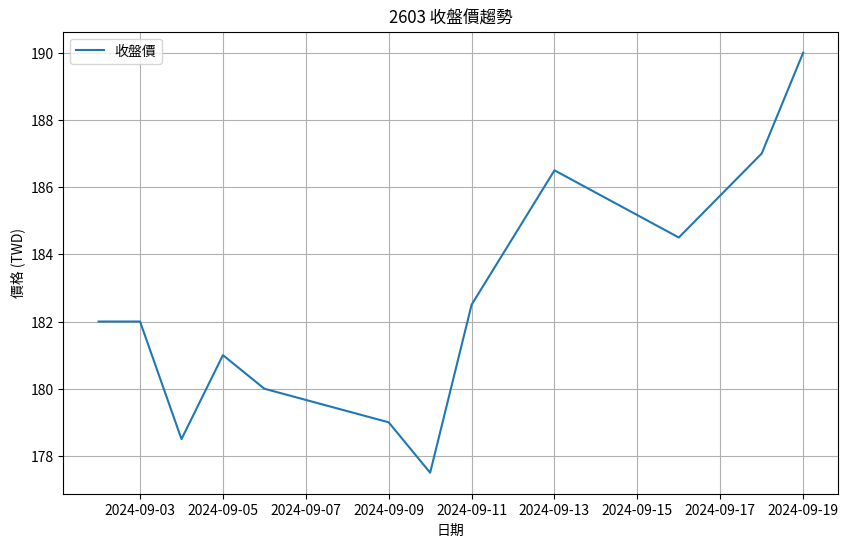

In [ ]:
import matplotlib.pyplot as plt

# 繪製收盤價趨勢圖
plt.figure(figsize=(10, 6))
plt.plot(df['日期'], df['收盤價'], label='收盤價')
plt.xlabel('日期')
plt.ylabel('價格 (TWD)')
plt.title(f'{stock_code} 收盤價趨勢')
plt.legend()
plt.grid(True)
plt.show()